In [56]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.utils import resample

In [57]:
train_df = pd.read_csv(r"D:\Nikunj\Projects\New folder\Prediction for Credit Card Approval\train_data.csv")
test_df = pd.read_csv(r"D:\Nikunj\Projects\New folder\Prediction for Credit Card Approval\test_data.csv")

In [58]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

In [59]:
train_df.describe()

,ID,Children count,Income,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Family member count,Account age,Is high risk
count,2.916500e+04,29165.000000,2.916500e+04,29165.000000,29165.000000,29165.0,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000,29165.000000
mean,5.078232e+06,0.430790,1.868904e+05,-15979.477490,59257.761255,1.0,0.224310,0.294977,0.090279,2.197531,-26.137734,0.017110
std,4.182400e+04,0.741882,1.014096e+05,4202.997485,137655.883458,0.0,0.417134,0.456040,0.286587,0.912189,16.486702,0.129682
min,5.008804e+06,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,5.042047e+06,0.000000,1.215000e+05,-19444.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,0.000000
50%,5.074666e+06,0.000000,1.575000e+05,-15565.000000,-1557.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,0.000000
75%,5.114629e+06,1.000000,2.250000e+05,-12475.000000,-412.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,0.000000
max,5.150485e+06,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,1.000000


In [60]:
train_df.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0


In [61]:
test_df.head()

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5091261,F,N,Y,0,202500.0,State servant,Secondary / secondary special,Separated,House / apartment,-16834,-1692,1,0,0,0,Medicine staff,1.0,-6.0,0
1,5096963,M,Y,N,0,675000.0,Commercial associate,Higher education,Married,House / apartment,-18126,-948,1,0,1,0,Managers,2.0,-16.0,0
2,5087880,F,N,N,0,234000.0,State servant,Higher education,Civil marriage,House / apartment,-21967,-5215,1,0,0,1,Core staff,2.0,-52.0,0
3,5021949,F,Y,Y,0,445500.0,Commercial associate,Higher education,Married,House / apartment,-12477,-456,1,0,0,0,Managers,2.0,-54.0,0
4,5105705,F,Y,N,0,225000.0,Working,Secondary / secondary special,Married,Municipal apartment,-12155,-667,1,0,0,0,Laborers,2.0,-48.0,0


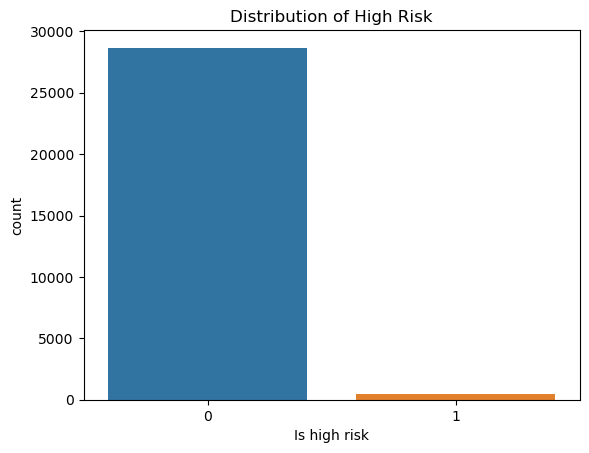

In [62]:
# Visualize the target variable distribution
sns.countplot(x='Is high risk', data=train_df)
plt.title('Distribution of High Risk')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_24872\134761846.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_df.corr()


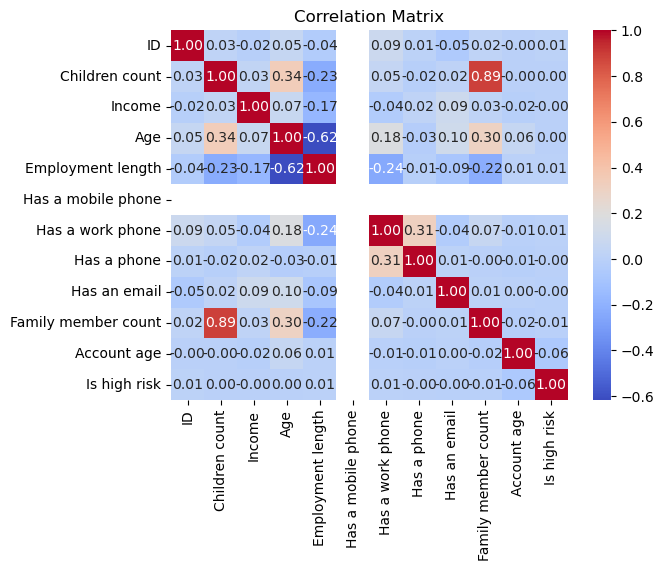

In [63]:
# Visualize correlation matrix
corr = train_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

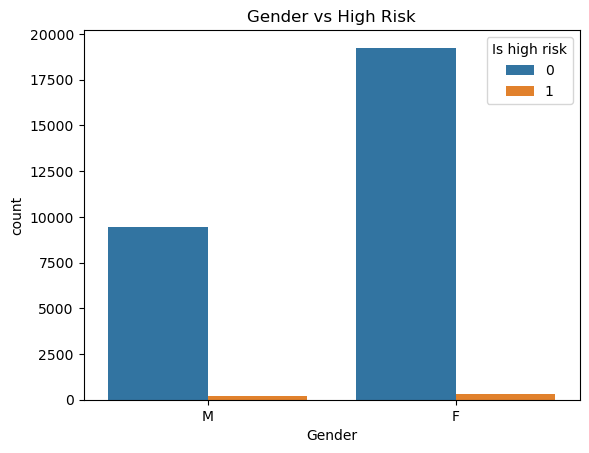

In [64]:
# Visualize categorical variables
sns.countplot(x='Gender', hue='Is high risk', data=train_df)
plt.title('Gender vs High Risk')
plt.show()

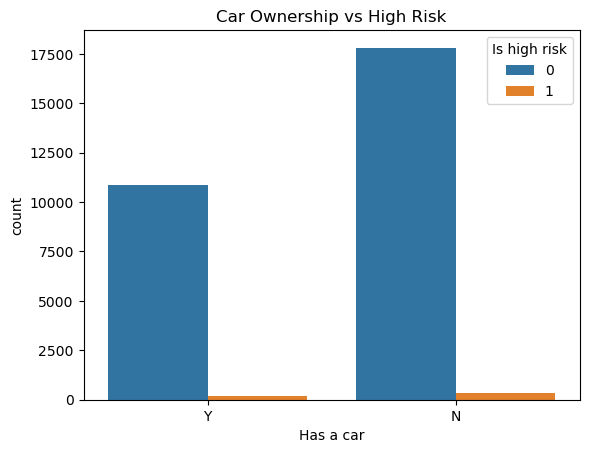

In [65]:
sns.countplot(x='Has a car', hue='Is high risk', data=train_df)
plt.title('Car Ownership vs High Risk')
plt.show()

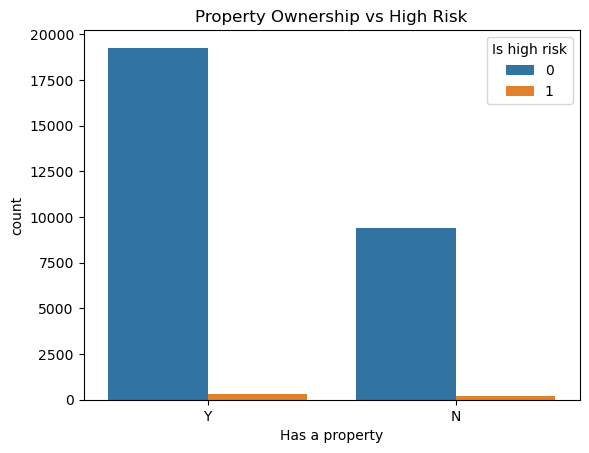

In [66]:
sns.countplot(x='Has a property', hue='Is high risk', data=train_df)
plt.title('Property Ownership vs High Risk')
plt.show()

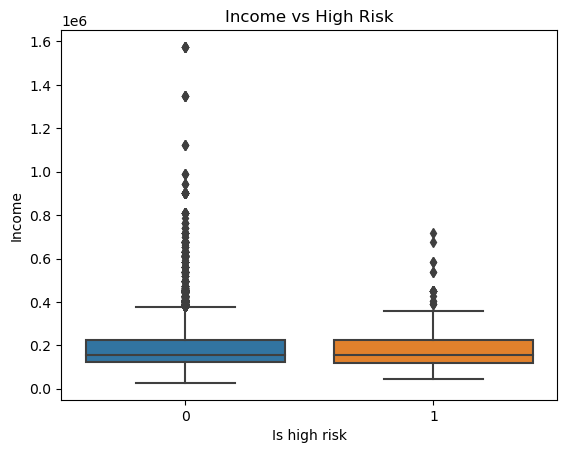

In [67]:
# Visualize numerical variables
sns.boxplot(x='Is high risk', y='Income', data=train_df)
plt.title('Income vs High Risk')
plt.show()

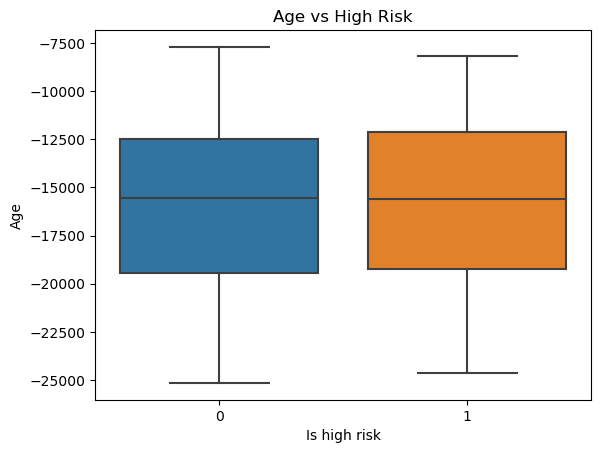

In [68]:
sns.boxplot(x='Is high risk', y='Age', data=train_df)
plt.title('Age vs High Risk')
plt.show()

In [ ]:
# Step 2: Data Preprocessing

# Drop ID column as it's not useful for prediction
train_df.drop(columns=['ID'], inplace=True)
test_df.drop(columns=['ID'], inplace=True)

In [70]:
# Handle missing values
imputer = SimpleImputer(strategy='median')
train_df[['Family member count', 'Account age', 'Employment length']] = imputer.fit_transform(train_df[['Family member count', 'Account age', 'Employment length']])
test_df[['Family member count', 'Account age', 'Employment length']] = imputer.transform(test_df[['Family member count', 'Account age', 'Employment length']])

In [71]:
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = ['Gender', 'Has a car', 'Has a property', 'Employment status', 'Education level', 'Marital status', 'Dwelling', 'Has a mobile phone', 'Has a work phone', 'Has a phone', 'Has an email', 'Job title']
for col in categorical_cols:
    train_df[col] = label_encoder.fit_transform(train_df[col].astype(str))
    test_df[col] = label_encoder.transform(test_df[col].astype(str))

In [72]:
# Step 3: Model Selection and Training

# Split the data into features and target variable
X = train_df.drop(columns=['Is high risk'])
y = train_df['Is high risk']

In [73]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [75]:
# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [76]:
# Step 4: Model Evaluation

# Predict on validation set
y_pred = rf_classifier.predict(X_val_scaled)

# Evaluate the model
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5747
           1       0.31      0.09      0.14        86

    accuracy                           0.98      5833
   macro avg       0.65      0.54      0.57      5833
weighted avg       0.98      0.98      0.98      5833



In [77]:
# Calculate precision and recall for the whole model
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.3076923076923077
Recall: 0.09302325581395349


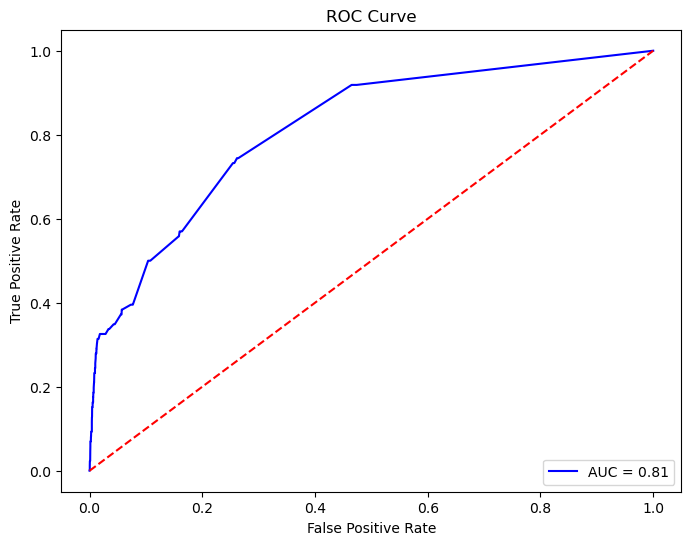

In [78]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for the positive class (high-risk)
y_probs = rf_classifier.predict_proba(X_val_scaled)[:, 1]

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_val, y_probs)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [79]:
# Separate majority and minority classes
df_majority = train_df[train_df['Is high risk'] == 0]
df_minority = train_df[train_df['Is high risk'] == 1]

In [80]:
# Upsample minority class
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the dataset
df_downsampled = df_downsampled.sample(frac=1, random_state=42)


In [81]:
# Separate features and target variable
X_downsampled = df_downsampled.drop(columns=['Is high risk'])
y_downsampled = df_downsampled['Is high risk']

In [82]:
# Split the downsampled data into training and validation sets
X_train_downsampled, X_val_downsampled, y_train_downsampled, y_val_downsampled = train_test_split(X_downsampled, y_downsampled, test_size=0.2, random_state=42)

In [83]:
# Train a Random Forest classifier on the downsampled data
rf_classifier_downsampled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_downsampled.fit(X_train_downsampled, y_train_downsampled)

# Predict on validation set
y_pred_rf_downsampled = rf_classifier_downsampled.predict(X_val_downsampled)

In [84]:
# Evaluate the model
print("Random Forest Classifier Evaluation with Balanced Classes:")
print("Classification Report:")
print(classification_report(y_val_downsampled, y_pred_rf_downsampled))

Random Forest Classifier Evaluation with Balanced Classes:
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.60      0.66       111
           1       0.59      0.72      0.65        89

    accuracy                           0.66       200
   macro avg       0.66      0.66      0.65       200
weighted avg       0.67      0.66      0.66       200



In [85]:
# Calculate accuracy
accuracy_rf_downsampled = accuracy_score(y_val_downsampled, y_pred_rf_downsampled)
print(f"Accuracy: {accuracy_rf_downsampled:.2f}")

Accuracy: 0.66


In [86]:
# Calculate precision and recall for the whole model
precision_rf_downsampled = precision_score(y_val_downsampled, y_pred_rf_downsampled)
recall_rf_downsampled = recall_score(y_val_downsampled, y_pred_rf_downsampled)

print("Precision:", precision_rf_downsampled)
print("Recall:", recall_rf_downsampled)


Precision: 0.5925925925925926
Recall: 0.7191011235955056


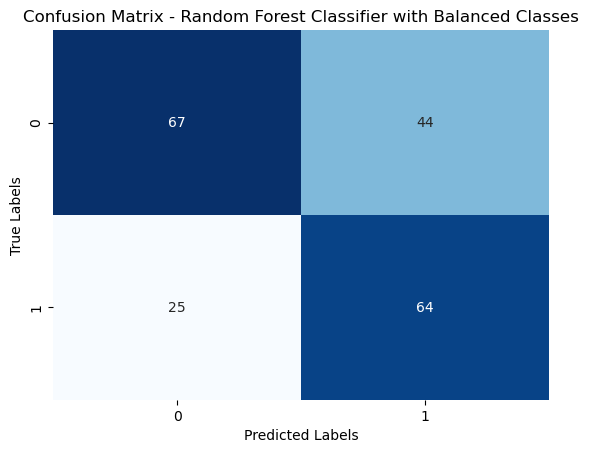

In [87]:
# Draw confusion matrix
conf_matrix_rf_downsampled = confusion_matrix(y_val_downsampled, y_pred_rf_downsampled)
sns.heatmap(conf_matrix_rf_downsampled, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest Classifier with Balanced Classes')
plt.show()

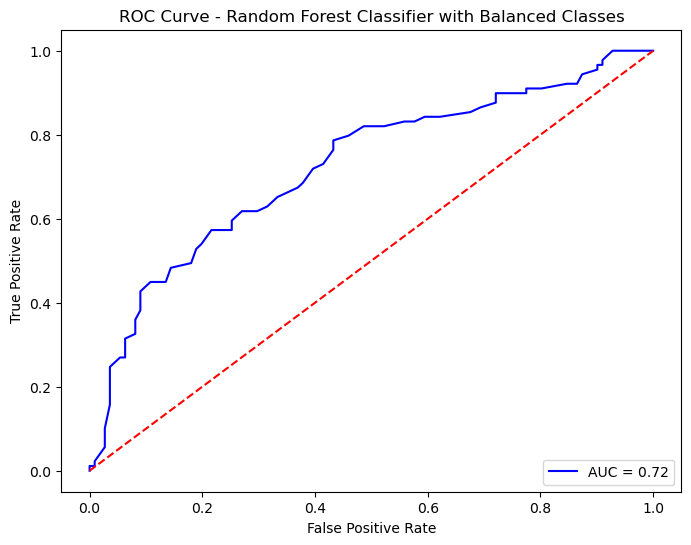

In [88]:
# Predict probabilities for the positive class (high-risk) on the validation set
y_probs_downsampled = rf_classifier_downsampled.predict_proba(X_val_downsampled)[:, 1]

# Calculate AUC-ROC score
auc_roc_downsampled = roc_auc_score(y_val_downsampled, y_probs_downsampled)

# Calculate ROC curve
fpr_downsampled, tpr_downsampled, thresholds_downsampled = roc_curve(y_val_downsampled, y_probs_downsampled)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_downsampled, tpr_downsampled, color='blue', label=f'AUC = {auc_roc_downsampled:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier with Balanced Classes')
plt.legend(loc='lower right')
plt.show()
